In [34]:
import pickle
import sys
from sklearn.feature_extraction.text import CountVectorizer
from tqdm import tqdm_notebook # progress bar
from konlpy.tag import Mecab; mecab = Mecab()

import numpy as np
import pandas as pd
import string
import re
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import platform
from matplotlib import font_manager, rc
%matplotlib inline

/Users/johanjun/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [6]:
## 글꼴 세팅

path = "c:/Windows/Fonts/malgun.ttf"
font_name = 'AppleGothic'
rc('font', family='AppleGothic')

warnings.simplefilter(action='ignore')

tokenizer = "nouns" # nouns, morphs, word, predefined

In [7]:
with open('tokenized_documents.pkl', 'rb') as f:
    tokenized_documents = pickle.load(f)

In [8]:
print(len(tokenized_documents))
print(tokenized_documents[0])

100
['말', '병', '일요일', '상품', '수', '쿠팡', '주식', '응원', '기사', '덕분', '일요일', '거', '생각', '응원', '감사', '사람', '거', '디자인', '색인', '로즈', '골드', '아이폰', '골', '실버', '줄질', '줄질', '관심', '고민', 'ㄴ', 'ㄴ', '거', '필요', '기능', '중요', '대신', '구매', '일요일', '강아지', '강아지', '밤', '기인', '산책', '축어', '이건', '검색', '기기', '결함', '교환', '신청', '인터넷', '방법', '나머지', '시계', '역할', '팟', '소리', '조절', '버튼', '거', '그건', '알람', '시리', '날씨', '계산기', '운동', '플', '다운', '기본', '플', '사용', '노래', '검색', '정도', '나름', '사용', '거', '핸드폰', '손목', '부담', '시계', '편', '봄', '여름', '시계', '겨울', '손', '옷', '때문', '불편', '겨울', '이유', '트랩', '트랩', '디자인', '생각', '기본', '며칠', '인터넷', '가지', '알리', '건', '네이버', '밀레', '니즈', '건', '사용', '여름', '사용', '거', '밀레', '니즈', '스포츠', '훠', '건', '밀레', '니즈', '여름', '밀레', '니즈', '겨울', '스포츠', '사용', '옷', '스포츠', '여름', '땀', '군요', '줄질', '종류', '케이스', '터치', '거', '쿠팡', '액정', '필름', '사용', '네이버', '검색', '사용', '아이폰', '맥북', '사용', '거', '생태', '계란', '앞', '아이폰', '맥북', '해제', '기대', '지금', '마스크', '불편', '페이스', '아이디', '폰', '생활', '단계', '정리', '느낌', '뭐', '추천', '추천', '시계', '사용', '분', '시계', '

### gensim LDA modeling

In [9]:
from gensim.corpora import Dictionary

In [10]:
# 문서-단어 행렬 만들기 # LDA의 input.
# 어휘(vocabulary) 학습
dictionary = Dictionary(tokenized_documents)
# dictionary.token2id
# dictionary.id2token

# 문서-단어 행렬 생성
corpus = [dictionary.doc2bow(document) for document in tokenized_documents]

In [11]:
NUM_TOTAL_WORDS = len(dictionary)
print(dictionary)
print(NUM_TOTAL_WORDS)

Dictionary(1361 unique tokens: ['ㄴ', '가지', '감사', '강아지', '거']...)
1361


In [12]:
corpus[0]

[(0, 2),
 (1, 1),
 (2, 1),
 (3, 2),
 (4, 9),
 (5, 3),
 (6, 4),
 (7, 3),
 (8, 1),
 (9, 1),
 (10, 1),
 (11, 1),
 (12, 1),
 (13, 1),
 (14, 1),
 (15, 1),
 (16, 1),
 (17, 1),
 (18, 1),
 (19, 1),
 (20, 2),
 (21, 1),
 (22, 2),
 (23, 1),
 (24, 1),
 (25, 1),
 (26, 2),
 (27, 1),
 (28, 2),
 (29, 1),
 (30, 1),
 (31, 4),
 (32, 1),
 (33, 1),
 (34, 1),
 (35, 1),
 (36, 1),
 (37, 2),
 (38, 1),
 (39, 1),
 (40, 1),
 (41, 1),
 (42, 1),
 (43, 2),
 (44, 1),
 (45, 1),
 (46, 4),
 (47, 1),
 (48, 1),
 (49, 1),
 (50, 1),
 (51, 1),
 (52, 1),
 (53, 1),
 (54, 2),
 (55, 1),
 (56, 10),
 (57, 1),
 (58, 1),
 (59, 1),
 (60, 2),
 (61, 1),
 (62, 1),
 (63, 1),
 (64, 1),
 (65, 1),
 (66, 1),
 (67, 1),
 (68, 3),
 (69, 6),
 (70, 1),
 (71, 1),
 (72, 1),
 (73, 1),
 (74, 1),
 (75, 3),
 (76, 1),
 (77, 1),
 (78, 1),
 (79, 1),
 (80, 4),
 (81, 1),
 (82, 2),
 (83, 1),
 (84, 1),
 (85, 2),
 (86, 1),
 (87, 1),
 (88, 2),
 (89, 3),
 (90, 1),
 (91, 1),
 (92, 1),
 (93, 1),
 (94, 1),
 (95, 3),
 (96, 1),
 (97, 1),
 (98, 2),
 (99, 1),
 (100, 1)

In [13]:
from gensim import models
tfidf = models.TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]
corpus_tfidf[0][:5]

[(0, 0.14992366028163676),
 (1, 0.03767447629336458),
 (2, 0.0671923445013273),
 (3, 0.14992366028163676),
 (4, 0.09694144569903726)]

In [14]:
# gensim에서 ldamodel 불러오기
from gensim.models import LdaModel
# lda를 측정하는 지표인 coherence score 계산
from gensim.models import CoherenceModel

from time import time
import os
import gensim

In [15]:
# 토픽 개수와 토픽 별 단어 출력 개수 지정.
NUM_TOPIC_WORDS = 30


def build_doc_term_mat(documents):
    """주어진 문서 집합으로 문서-어휘 행렬을 만들어 돌려준다."""
    
    print_log_msg("Building document-term matrix.")
    dictionary = Dictionary(documents)
    corpus = [dictionary.doc2bow(document) for document in documents]

    return corpus, dictionary


def print_topic_words(model): # model <- (학습이 완료된)ldamodel
    """토픽별 토픽 단어들을 화면에 인쇄한다."""
    
    print_log_msg("Printing topic words.")
    for topic_id in range(model.num_topics):
        print("==== Topic : %d ====" % topic_id)
        topic_probs = model.show_topic(topic_id, NUM_TOPIC_WORDS)
        for word, prob in topic_probs:
            print("%s\t%.4f" % (word, prob))
    
    
    

def print_log_msg(msg):
    """로그 메시지를 출력한다."""
    
    print(msg, flush=True)

In [18]:
def compute_coherence(dictionary, corpus, texts, start=8, end=81, step=4):
    coherence_score_list = []
    model_list = []
    # 토픽개수를 2부터 10까지 하고 싶다. -> range(2, 11, 1)
    for num_topics in tqdm_notebook(range(start, end, step)):
        # LDA model 학습코드
        
        model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        model_list.append(model)
        
        # Coherence Score 학습 코드
        coherence_model = CoherenceModel(model=model, texts=tokenized_documents,
                                        corpus=corpus, dictionary=dictionary, coherence='c_v')
        coherence_score_list.append(coherence_model.get_coherence())
        
    return model_list, coherence_score_list

In [20]:
start, end, step = [int(x) for x in input("원하는 토픽 갯수들을 입력하세요(e.g. 2,5,1)").split(",")]
start, end, step

원하는 토픽 갯수들을 입력하세요(e.g. 2,5,1)2,5,1


(2, 5, 1)

In [21]:
import pickle

corpus, dictionary = build_doc_term_mat(tokenized_documents)
print(len(corpus), len(dictionary))

write_flag = False


model_path = f"model-test_K({start}-{end})_with_{tokenizer}words.pk"
if os.path.exists(model_path):
    with open(model_path, 'rb') as f:
        model_list = pickle.load(f)
else:
    write_flag = True
    
csScore_path = f"Coherence-test_K({start}-{end})_with_{tokenizer}words.pk"
if os.path.exists(csScore_path):
    with open(csScore_path, 'rb') as f:
        coherence_scores = pickle.load(f)
else:
    write_flag = True


if write_flag:
    # 주어진 토픽 개수들에 대해 LDA model, Coherence model 학습
    model_list, coherence_scores = compute_coherence(dictionary=dictionary,
                                                    corpus=corpus,
                                                    texts=tokenized_documents,
                                                    start=start,
                                                    end=end,
                                                    step=step)
    

    with open(model_path, 'wb') as f:
        pickle.dump(model_list, f)
    
    with open(csScore_path, 'wb') as f:
        pickle.dump(coherence_scores, f)

Building document-term matrix.
100 1361


In [22]:
model_list

In [27]:
print_topic_words(model_list[2])

Printing topic words.
==== Topic : 0 ====
거	0.0248
고민	0.0163
구매	0.0144
사용	0.0133
핸드폰	0.0128
실버	0.0126
수	0.0121
기능	0.0119
쿠팡	0.0103
밴드	0.0100
생각	0.0094
손목	0.0088
배송	0.0086
주문	0.0081
시계	0.0079
정도	0.0072
운동	0.0072
분	0.0068
화면	0.0067
만	0.0062
제품	0.0060
아이폰	0.0059
만족	0.0059
여자	0.0058
공홈	0.0051
원	0.0051
트랩	0.0050
사이즈	0.0050
그레이	0.0047
번	0.0047
==== Topic : 1 ====
구매	0.0255
고민	0.0201
생각	0.0192
기능	0.0158
배송	0.0129
수	0.0129
거	0.0119
사용	0.0105
손목	0.0097
운동	0.0095
만족	0.0095
쿠팡	0.0088
시계	0.0076
아이폰	0.0074
필요	0.0071
폰	0.0067
추천	0.0066
만	0.0066
게	0.0064
분	0.0064
중	0.0060
확인	0.0055
말	0.0053
정도	0.0052
주문	0.0052
착용	0.0048
여자	0.0048
전화	0.0047
화면	0.0047
상품	0.0046
==== Topic : 2 ====
사용	0.0248
기능	0.0193
거	0.0183
수	0.0153
구매	0.0126
운동	0.0121
고민	0.0109
생각	0.0102
만족	0.0082
손	0.0079
앱	0.0077
중	0.0077
핸드폰	0.0075
가격	0.0073
필요	0.0073
아이폰	0.0071
시계	0.0068
정도	0.0067
실버	0.0067
폰	0.0066
배송	0.0063
쿠팡	0.0059
원	0.0057
분	0.0052
트랩	0.0052
손목	0.0052
확인	0.0051
게	0.0045
번	0.0044
때문	0.0042
==== Topic : 3 ====
구매	0.0213
거	0.0

In [28]:
model_list[0].show_topic(0, NUM_TOPIC_WORDS)

[('거', 0.020831076),
 ('구매', 0.01701285),
 ('기능', 0.016062064),
 ('수', 0.016003728),
 ('고민', 0.012656386),
 ('시계', 0.011858461),
 ('생각', 0.011401884),
 ('사용', 0.01029409),
 ('쿠팡', 0.008830393),
 ('분', 0.008604475),
 ('운동', 0.008378202),
 ('실버', 0.00805488),
 ('확인', 0.0076926914),
 ('핸드폰', 0.0074902195),
 ('손목', 0.0074868477),
 ('폰', 0.007463421),
 ('정도', 0.007098145),
 ('만족', 0.007041561),
 ('만', 0.006152858),
 ('배송', 0.0061400197),
 ('원', 0.0057893666),
 ('가격', 0.005540407),
 ('게', 0.0053548533),
 ('화면', 0.005093483),
 ('때문', 0.0050921235),
 ('추천', 0.0050262655),
 ('아이폰', 0.004895087),
 ('필요', 0.0048078867),
 ('주문', 0.0047575156),
 ('밴드', 0.0045705256)]

In [30]:
model_list[2].show_topic(0, NUM_TOPIC_WORDS)

[('거', 0.024779644),
 ('고민', 0.01627922),
 ('구매', 0.014352321),
 ('사용', 0.0133450795),
 ('핸드폰', 0.012808723),
 ('실버', 0.01258032),
 ('수', 0.012107962),
 ('기능', 0.011920761),
 ('쿠팡', 0.010313151),
 ('밴드', 0.010031216),
 ('생각', 0.009428467),
 ('손목', 0.008768265),
 ('배송', 0.00857113),
 ('주문', 0.008079448),
 ('시계', 0.007907029),
 ('정도', 0.0071872915),
 ('운동', 0.0071687256),
 ('분', 0.006805515),
 ('화면', 0.0067007155),
 ('만', 0.0061664544),
 ('제품', 0.0060009477),
 ('아이폰', 0.0059306594),
 ('만족', 0.0058801305),
 ('여자', 0.0057792403),
 ('공홈', 0.0050788997),
 ('원', 0.0050514713),
 ('트랩', 0.005045247),
 ('사이즈', 0.0049836845),
 ('그레이', 0.0047239475),
 ('번', 0.004709086)]

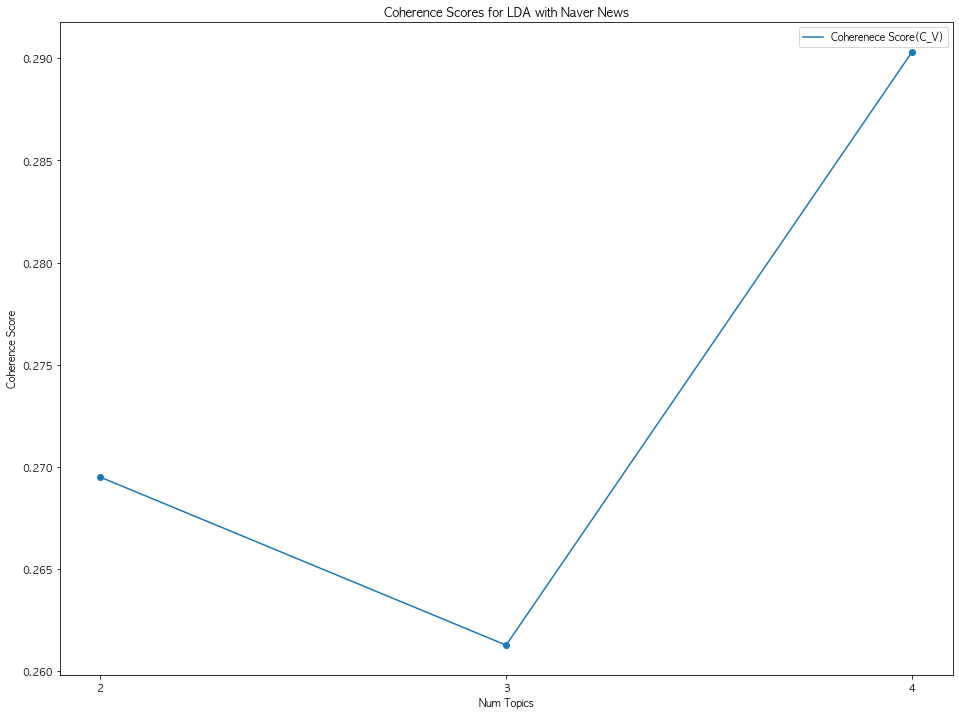

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline


coherence_list = coherence_scores
label = "Coherenece Score(C_V)"

x = range(start, end, step)
plt.figure(figsize=(16, 12))
plt.xticks(x)
plt.plot(x, coherence_list, label=label)
plt.scatter(x, coherence_list)
plt.title(f"Coherence Scores for LDA with Naver News")
plt.xlabel("Num Topics")
plt.ylabel("Coherence Score")
plt.legend(loc='best')
plt.show()

In [32]:
# 학습한 LDA 모델중에 가장 coherence score가 높은 모델을 선정
# model_list, coherence_list는 여러개의 토픽에 대해서 학습한 모델과 cs를 저장하고 있는 리스트.
# np.argmax는 리스트의 최대값을 가지는 원소의 index를 return.
# e.g. start,end,step = (2,5,1) -> 2,3,4  -> [0, 1, 2]
# 만약에 K=4일 때 베스트라면, np.argmax는 2.
selected_model = model_list[np.argmax(coherence_list)]
selected_model.num_topics

4

In [35]:
# pyLDAvis 불러오기
import pyLDAvis
import pyLDAvis.gensim_models

# pyLDAvis를 jupyter notebook에서 실행할 수 있게 활성화.
pyLDAvis.enable_notebook()

# pyLDAvis 실행.
data = pyLDAvis.gensim_models.prepare(selected_model, corpus=corpus, dictionary=dictionary)
data

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.008001  0.023385       1        1  27.084415
0     -0.021102 -0.017464       2        1  26.098373
3      0.005520  0.002314       3        1  25.608217
1      0.023583 -0.008235       4        1  21.208996, topic_info=    Term        Freq       Total Category  logprob  loglift
16    구매  116.000000  116.000000  Default  30.0000  30.0000
60    생각   72.000000   72.000000  Default  29.0000  29.0000
139   배송   51.000000   51.000000  Default  28.0000  28.0000
56    사용   97.000000   97.000000  Default  27.0000  27.0000
11    고민   96.000000   96.000000  Default  26.0000  26.0000
..   ...         ...         ...      ...      ...      ...
53     분    8.704601   47.941126   Topic4  -5.0560  -0.1554
164   주문    7.074857   31.041617   Topic4  -5.2633   0.0720
90    정도    7.154169   44.791115   Topic4  -5.2522  -0.2836
163   전화    6.372859   29.691429   Topic4  -5.3678   0.0119
114   화면    6.365709   30.335687   Topic4  -5.3689  -0.0107

[319 rows x 6 columns], token_table=      Topic      Freq Term
term                      
1190      1  0.397037    ㄷ
1190      3  0.794075    ㄷ
116       1  0.354180   가격
116       2  0.163468   가격
116       3  0.326935   가격
...     ...       ...  ...
1137      2  0.609584   회중
180       1  0.423205   후기
180       2  0.211603   후기
180       3  0.211603   후기
180       4  0.141068   후기

[517 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 4, 2])